<a href="https://colab.research.google.com/github/FERPAOLONI/DATA-II/blob/main/TrabajoFinalDataSIIFernandoPaoloni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRABAJO FINAL DATA SCIENCE II**

**Abstracto: Análisis Avanzado de Datos Agrícolas de Soja**

**Motivación**

El rendimiento de la soja es un factor clave en la industria agrícola y en la seguridad alimentaria global. Este análisis busca comprender cómo diversas características agronómicas, como la altura de la planta, el número de vainas, el contenido de proteínas y el índice de área foliar, afectan el rendimiento de la soja. Al identificar patrones y correlaciones dentro del dataset, se pueden optimizar las prácticas agrícolas para mejorar la producción y la calidad del cultivo.

**Audiencia**

Este análisis será de gran utilidad para agricultores, agrónomos, investigadores en biotecnología, empresas del sector agroindustrial y responsables de políticas agrícolas. Al obtener información basada en datos, estos grupos podrán tomar decisiones más informadas sobre estrategias de cultivo, selección de semillas y optimización de recursos para maximizar la productividad de la soja.

PREGUNTAS DE INTERES

¿Cuáles son los principales factores que influyen en el rendimiento de la soja
(SYUA - Seed Yield per Unit Area)?

¿Cómo afectan las variables climáticas y de suelo al rendimiento?

¿Existe una relación entre la altura de la planta y la cantidad de vainas?

¿Qué características predicen mejor un alto rendimiento?


## LECTURA DE DATOS

**Librerias necesarias para el analisis de datos**

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-learn

**LECTURA DEL DATASET**

In [2]:
url = 'https://raw.githubusercontent.com/FERPAOLONI/DATA-II/refs/heads/main/Advanced%20Soybean%20Agricultural%20Dataset.csv'

**Análisis inicial del dataset**

In [3]:
df = pd.read_csv(url)
df.head(10)

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
0,C1S1G5,R1,50.5,130.3,111.0,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82
1,C2S3G4,R1,44.5,132.0,80.0,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13
2,C2S1G6,R1,52.2,150.0,83.0,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15
3,C1S1G1,R1,50.5,140.8,66.0,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14
4,C1S2G6,R2,49.2,175.6,73.0,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60
5,C2S2G6,R2,52.0,136.0,62.0,0.265,0.633,4.3,1.2,33.5,44.4,0.07,3985.2,2.06,0.30
6,C1S1G6,R2,44.2,147.3,115.0,0.463,0.762,1.1,2.1,37.3,31.9,0.10,3029.3,1.60,0.48
7,C1S3G5,R1,52.0,158.3,205.0,0.531,0.677,1.2,3.2,33.3,32.6,0.07,6645.7,1.87,0.40
8,C2S2G4,R2,49.3,155.0,68.0,0.298,0.672,7.2,1.2,31.1,38.1,0.06,3104.6,1.80,0.18
9,C2S3G1,R1,45.8,151.0,87.0,0.323,0.717,1.9,2.5,37.6,37.5,0.03,4256.8,2.20,0.73


***VARIABLES***

**Parameters : Parámetros**


**Random : Estadío de la planta**


**Plant Height (PH) : Altura de la planta**

**Number of Pods (NP) : Número de vainas**


**Biological Weight (BW) : Peso biológico**


**Sugars (Su) : Azúcares**


**Relative Water Content in Leaves (RWCL) : Contenido relativo de agua en las hojas**


**ChlorophyllA663 : Clorofila A663**


**Chlorophyllb649 : Clorofila B649**


**Protein Percentage (PPE) : Porcentaje de proteína**


**Weight of 300 Seeds (W3S) : Peso de 300 semillas**


**Leaf Area Index (LAI) : Índice de área foliar**


**Seed Yield per Unit Area (SYUA) : Rendimiento de semillas por unidad de área**


**Number of Seeds per Pod (NSP) : Número de semillas por vaina**


**Protein Content (PCO) : Contenido de proteína**

# **VARIABLE OBJETIVO**

**Seed Yield per Unit Area (SYUA) : Rendimiento de semillas por unidad de área**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Parameters                               55450 non-null  object 
 1   Random                                   55450 non-null  object 
 2   Plant Height (PH)                        55450 non-null  float64
 3   Number of Pods (NP)                      55450 non-null  float64
 4   Biological Weight (BW)                   55450 non-null  float64
 5   Sugars (Su)                              55450 non-null  float64
 6   Relative Water Content in Leaves (RWCL)  55450 non-null  float64
 7   ChlorophyllA663                          55450 non-null  float64
 8   Chlorophyllb649                          55450 non-null  float64
 9   Protein Percentage (PPE)                 55450 non-null  float64
 10  Weight of 300 Seeds (W3S)                55450

In [5]:
df.columns

Index(['Parameters', 'Random ', 'Plant Height (PH)', 'Number of Pods (NP)',
       'Biological Weight (BW)', 'Sugars (Su)',
       'Relative Water Content in Leaves (RWCL)', 'ChlorophyllA663',
       'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Seed Yield per Unit Area (SYUA)', 'Number of Seeds per Pod (NSP)',
       'Protein Content (PCO)'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Plant Height (PH),55450.0,49.959392,3.052315,40.400,49.20000,50.300,52.000,55.700
Number of Pods (NP),55450.0,144.938979,20.015994,75.000,131.40000,147.000,158.000,218.000
Biological Weight (BW),55450.0,114.533886,48.925533,32.000,80.00000,102.000,133.000,236.000
Sugars (Su),55450.0,0.477543,0.236294,0.161,0.29500,0.466,0.612,1.115
Relative Water Content in Leaves (RWCL),55450.0,0.673621,0.084515,0.434,0.63225,0.677,0.722,0.875
ChlorophyllA663,55450.0,3.937670,2.846317,1.000,1.50000,2.300,6.700,10.200
Chlorophyllb649,55450.0,2.399096,1.187323,1.100,1.30000,2.200,3.100,7.800
Protein Percentage (PPE),55450.0,36.042123,2.417205,31.100,33.60000,36.600,38.000,39.900
Weight of 300 Seeds (W3S),55450.0,35.349129,4.999200,26.400,32.20000,34.500,37.200,53.900
Leaf Area Index (LAI),55450.0,0.072132,0.022278,0.020,0.06000,0.080,0.090,0.100


In [7]:
print(df.isnull().sum())

Parameters                                 0
Random                                     0
Plant Height (PH)                          0
Number of Pods (NP)                        0
Biological Weight (BW)                     0
Sugars (Su)                                0
Relative Water Content in Leaves (RWCL)    0
ChlorophyllA663                            0
Chlorophyllb649                            0
Protein Percentage (PPE)                   0
Weight of 300 Seeds (W3S)                  0
Leaf Area Index (LAI)                      0
Seed Yield per Unit Area (SYUA)            0
Number of Seeds per Pod (NSP)              0
Protein Content (PCO)                      0
dtype: int64


In [8]:
df.nunique()

,0
Parameters,35
Random,3
Plant Height (PH),56
Number of Pods (NP),72
Biological Weight (BW),82
Sugars (Su),91
Relative Water Content in Leaves (RWCL),83
ChlorophyllA663,50
Chlorophyllb649,28
Protein Percentage (PPE),44


# **Análisis Exploratorio de datos**

## Análisis Univariado

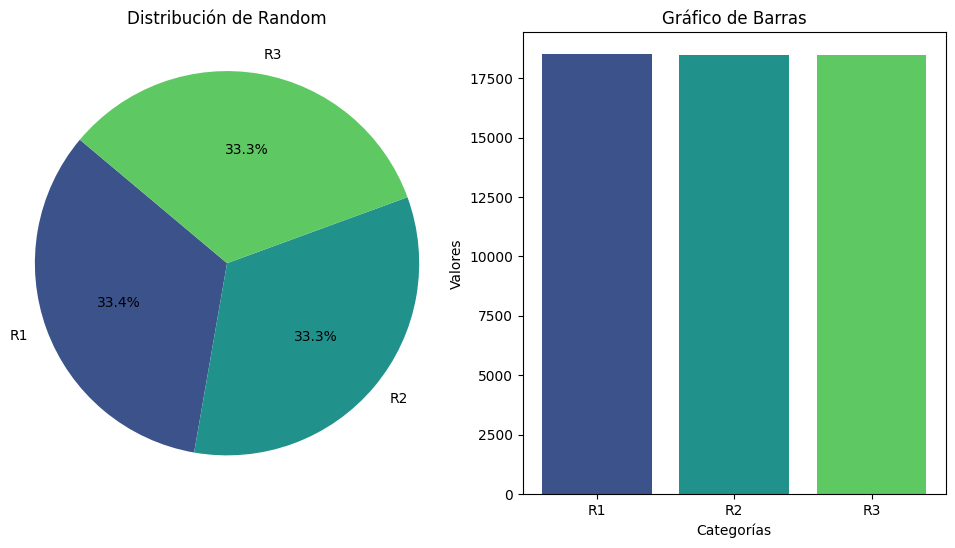

In [9]:
random_counts = df['Random '].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].pie(random_counts, labels=random_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(random_counts)))
axes[0].set_title('Distribución de Random')
axes[0].axis('equal')

axes[1].bar(random_counts.index, random_counts.values, color=sns.color_palette("viridis", len(random_counts)))
axes[1].set_title('Gráfico de Barras')
axes[1].set_xlabel('Categorías')
axes[1].set_ylabel('Valores')

plt.show()

In [10]:
numeric_df = df.select_dtypes(include=[np.number])

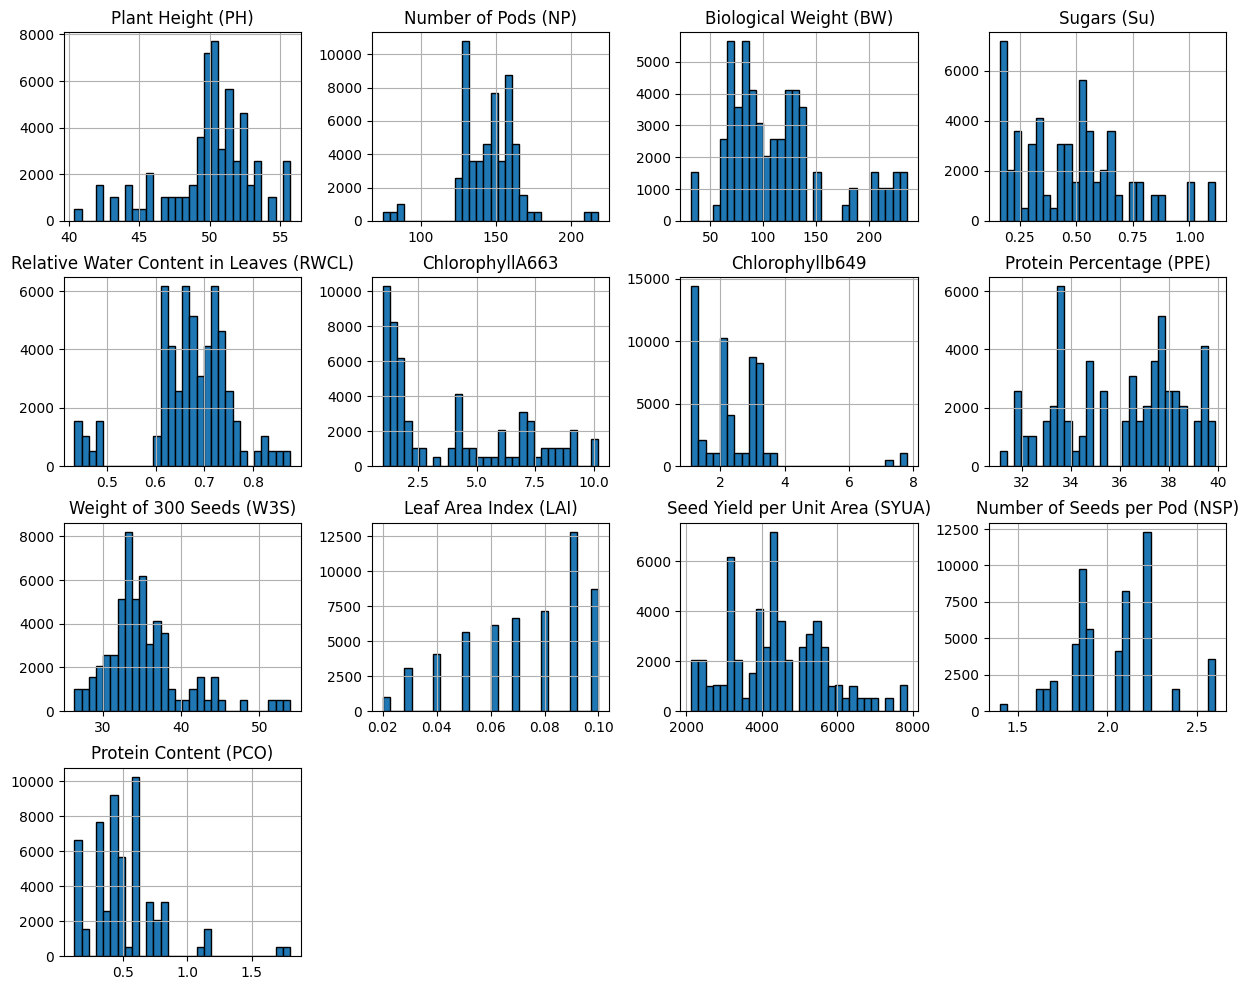

In [11]:
df.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.show()

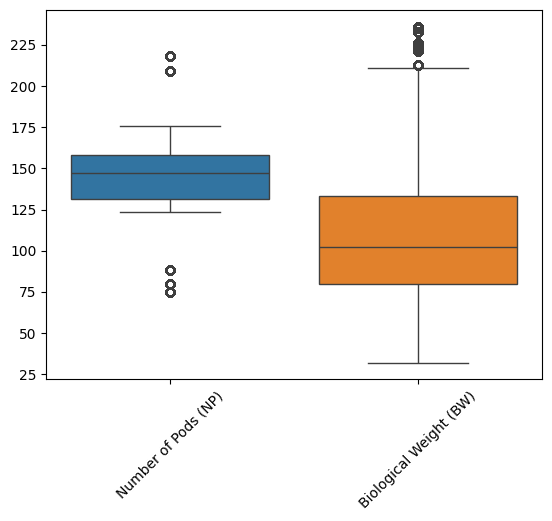

In [12]:
sns.boxplot(data=df[['Number of Pods (NP)', 'Biological Weight (BW)',]]) # Pass a list of column names to select multiple columns.
plt.xticks(rotation=45)
plt.show()


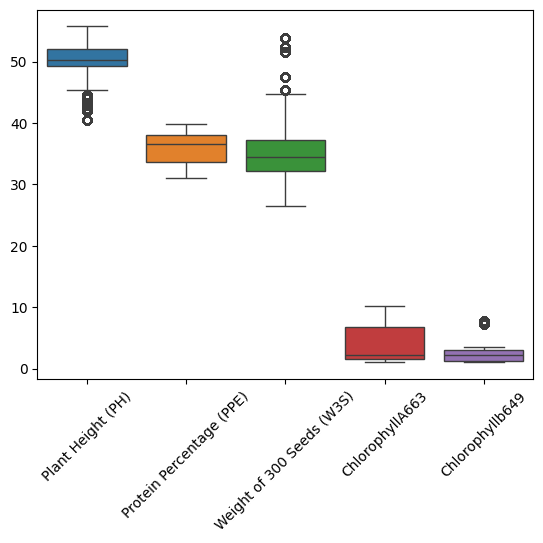

In [13]:
sns.boxplot(data=df[['Plant Height (PH)', 'Protein Percentage (PPE)', 'Weight of 300 Seeds (W3S)', 'ChlorophyllA663', 'Chlorophyllb649']]) # Pass a list of column names to select multiple columns.
plt.xticks(rotation=45)
plt.show()

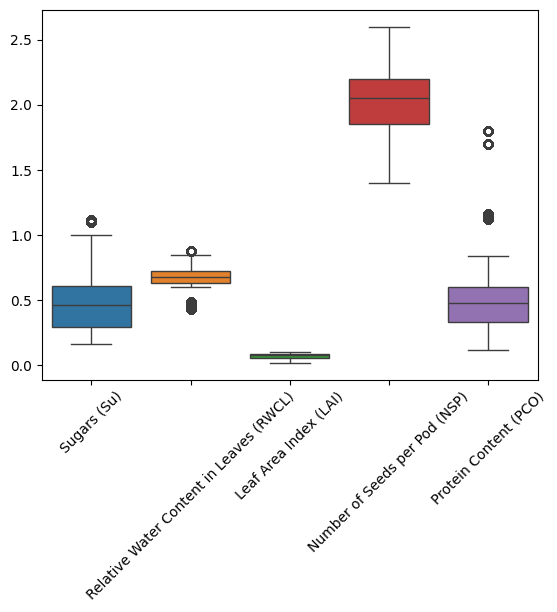

In [14]:
sns.boxplot(data=df[['Sugars (Su)', 'Relative Water Content in Leaves (RWCL)', 'Leaf Area Index (LAI)', 'Number of Seeds per Pod (NSP)', 'Protein Content (PCO)']]) # Pass a list of column names to select multiple columns.
plt.xticks(rotation=45)
plt.show()

## Análisis Bivariado

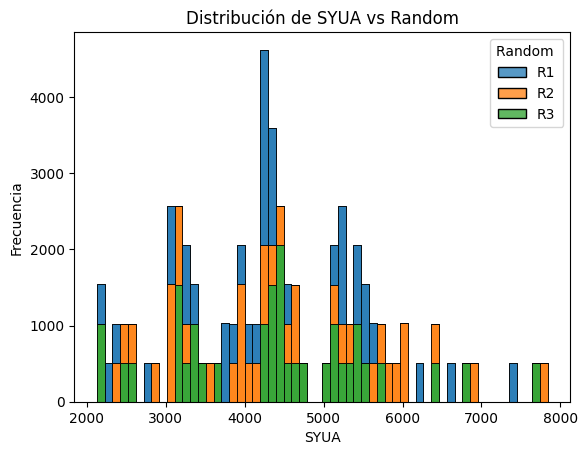

In [15]:
#Distribucion de Edad por Género
sns.histplot(data=df, x="Seed Yield per Unit Area (SYUA)", hue= 'Random ', multiple="stack")
#Distribucion de Edad por Género
sns.histplot(data=df, x="Seed Yield per Unit Area (SYUA)", hue= 'Random ', multiple="stack")
plt.title('Distribución de SYUA vs Random')
plt.xlabel('SYUA')
plt.ylabel('Frecuencia')
plt.show()

**ANALISIS MULTIVARIADO**

Pairplot para ver múltiples relaciones.

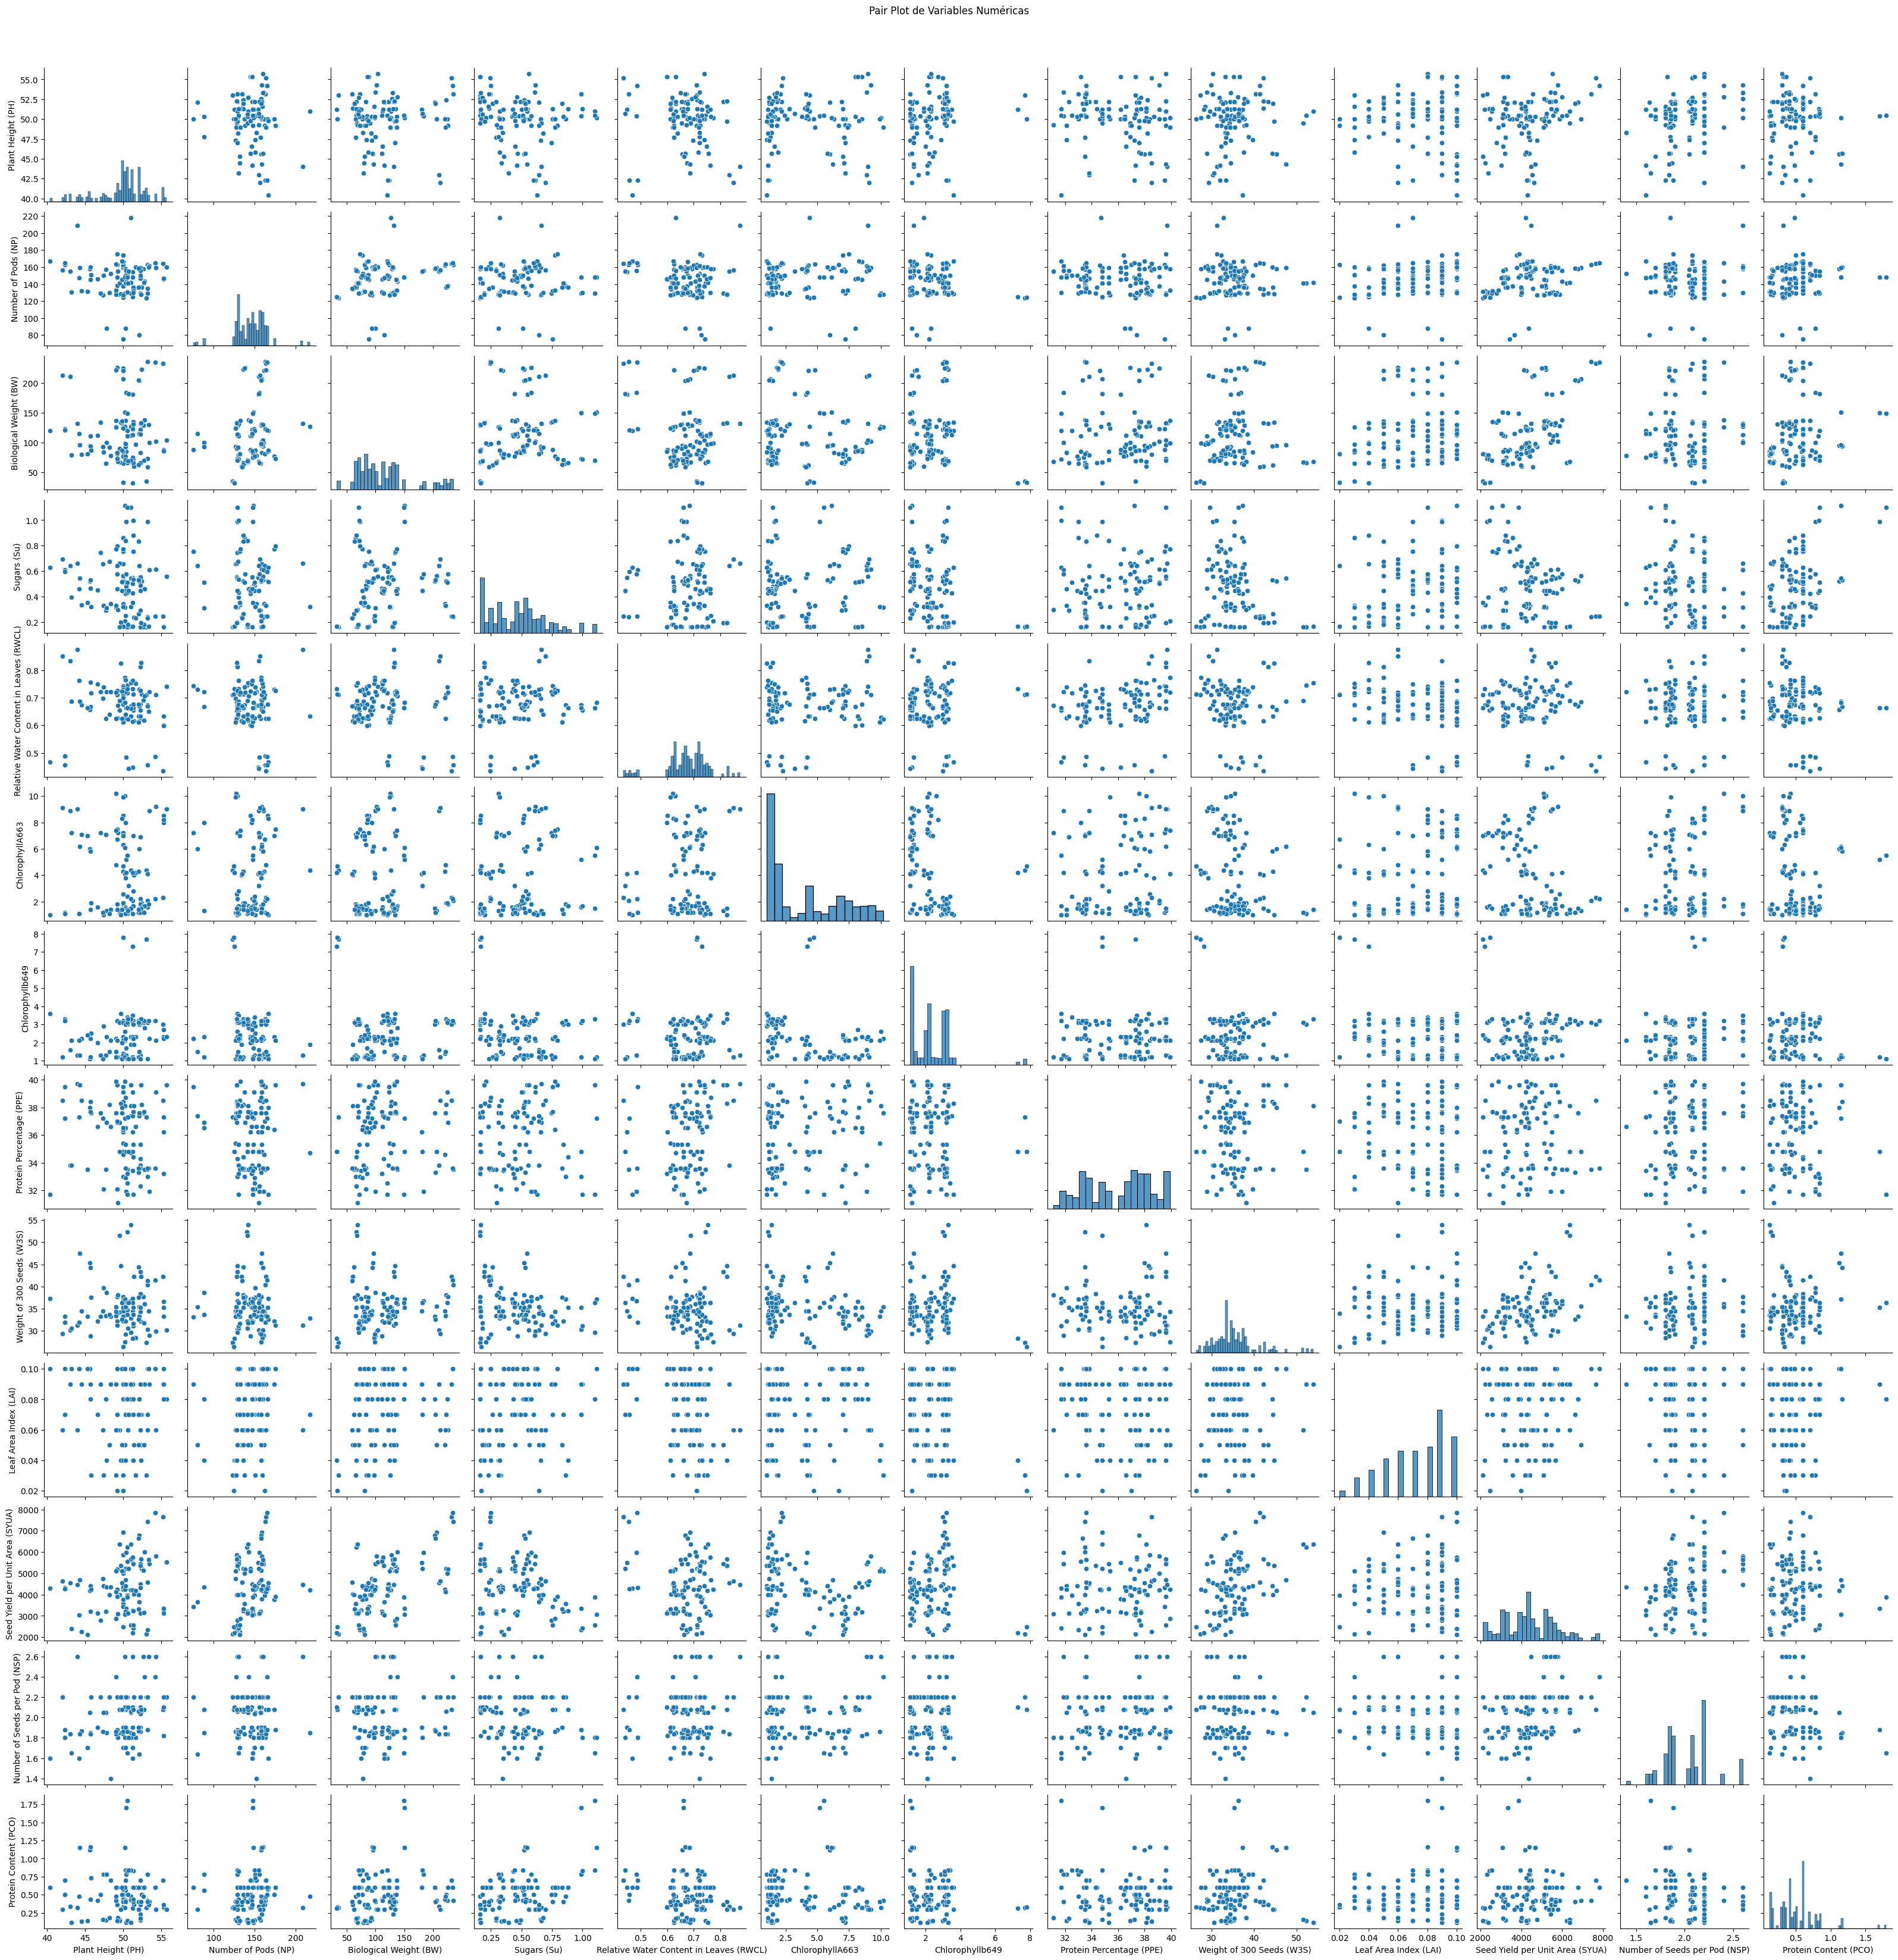

In [16]:
sns.pairplot(numeric_df.dropna().sample(frac=0.1))
plt.suptitle('Pair Plot de Variables Numéricas', y=1.02)
plt.show()

**DETECCION DE OUTLIERS**

In [17]:
# Variables del modelo (features, excluyendo la variable objetivo)
model_features = [col for col in numeric_df if col != "Seed Yield per Unit Area (SYUA)"]

# Define una función para detectar outliers usando el rango intercuartil (IQR)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Crear un DataFrame vacío para almacenar los porcentajes de outliers
outlier_model_df = pd.DataFrame(columns=['Variable', 'Outlier Percentage'])

# Iterar sobre las variables del modelo y calcular el porcentaje de outliers
for feature in model_features:
    outliers = detect_outliers_iqr(df, feature)  # Detectar outliers para la variable actual
    outlier_percentage = (len(outliers) / len(df)) * 100
    # Use pd.concat instead of append
    outlier_model_df = pd.concat([outlier_model_df, pd.DataFrame([{'Variable': feature, 'Outlier Percentage': outlier_percentage}])], ignore_index=True)

print(outlier_model_df)

                                   Variable  Outlier Percentage
0                         Plant Height (PH)            9.258792
1                       Number of Pods (NP)            5.550947
2                    Biological Weight (BW)            8.333634
3                               Sugars (Su)            2.779080
4   Relative Water Content in Leaves (RWCL)            9.262399
5                           ChlorophyllA663            0.000000
6                           Chlorophyllb649            2.777277
7                  Protein Percentage (PPE)            0.000000
8                 Weight of 300 Seeds (W3S)            4.629396
9                     Leaf Area Index (LAI)            0.000000
10            Number of Seeds per Pod (NSP)            0.000000
11                    Protein Content (PCO)            5.556357


<ipython-input-17-4307b96dfeb1>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_model_df = pd.concat([outlier_model_df, pd.DataFrame([{'Variable': feature, 'Outlier Percentage': outlier_percentage}])], ignore_index=True)


ANALISIS DE COMPONENTES PRINCIPALES

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)  # Elegimos 2 componentes principales
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

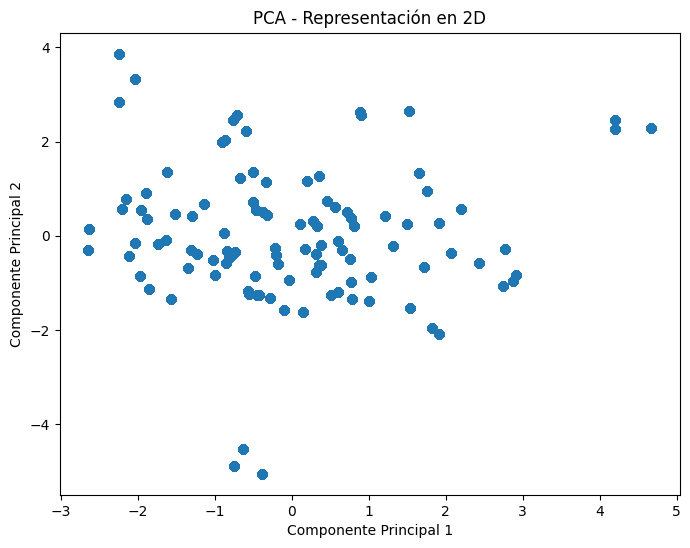

Varianza explicada por PC1: 0.17
Varianza explicada por PC2: 0.17


In [19]:
# Graficar los dos primeros componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Representación en 2D')
plt.show()

# Mostrar la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1: {explained_variance[0]:.2f}")
print(f"Varianza explicada por PC2: {explained_variance[1]:.2f}")

Esto significa que los dos primeros componentes principales explican juntos aproximadamente 34% de la varianza total de los datos.

In [20]:
correlacion = df.select_dtypes(include=np.number).corr()

**MATRIZ DE CORRELACION**

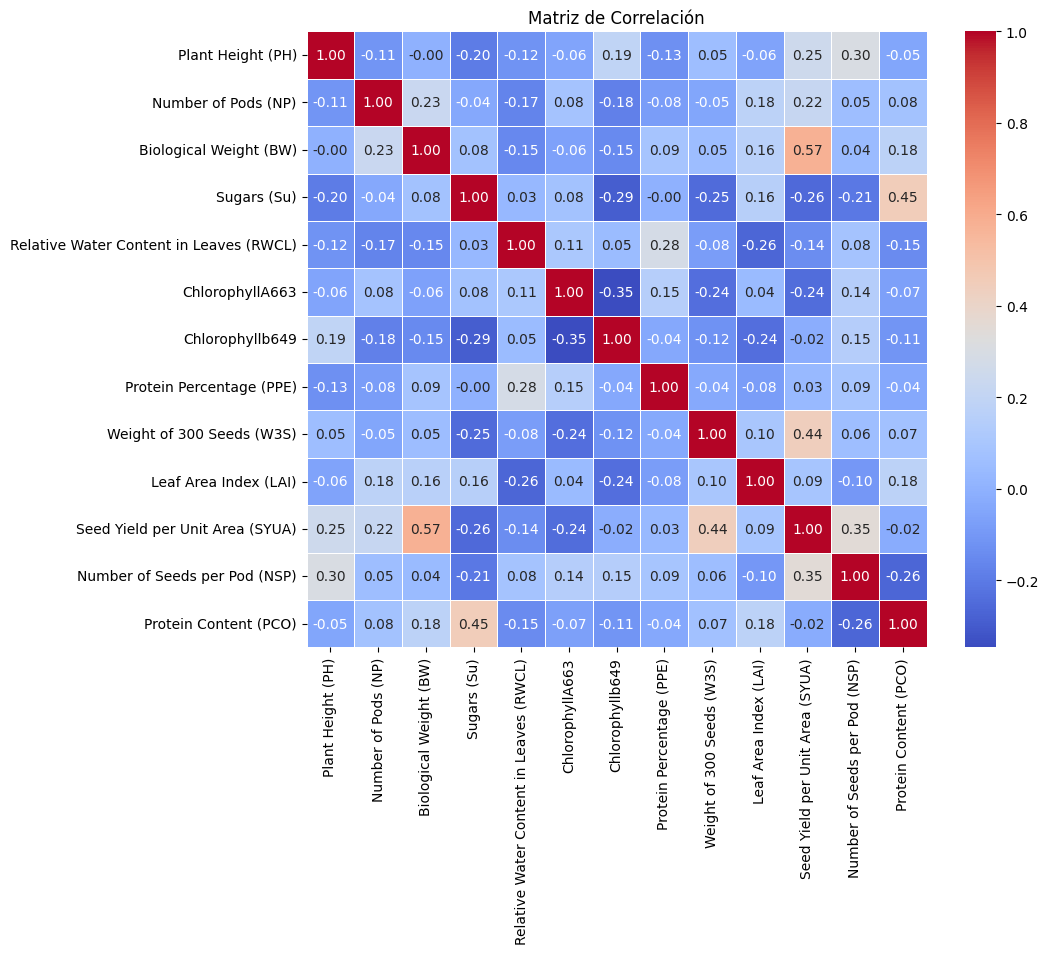

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correlación")
plt.show()

##**Modelo de Regresión lineal**

Librerias necesarias

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**División de datos en conjuntos de entrenamiento y prueba**

In [50]:
X = df.drop(['Parameters', 'Random ', 'Seed Yield per Unit Area (SYUA)'], axis=1)
y = df['Seed Yield per Unit Area (SYUA)']

In [51]:
# Variables independientes
X.columns

Index(['Plant Height (PH)', 'Number of Pods (NP)', 'Biological Weight (BW)',
       'Sugars (Su)', 'Relative Water Content in Leaves (RWCL)',
       'ChlorophyllA663', 'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Number of Seeds per Pod (NSP)', 'Protein Content (PCO)'],
      dtype='object')

In [52]:
# Variable dependiente
y.sample(10)

,Seed Yield per Unit Area (SYUA)
46716,3211.2
9982,3112.2
1914,2127.5
37195,6775.6
18491,5660.2
39844,5983.9
4866,3985.2
6143,3211.1
43429,3123.8
4261,3123.8


In [53]:
# Defino datos de entrenamiento (70%) y datos de prueba(30%) .
# Random_state:Establece una semilla de múmeros aleatorios que asegura que el código sea reproducible cada vez que lo corra.
# shuffle=True: Mezcla el orden de los datos para evitar sesgos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [54]:
lin_reg = LinearRegression()
# Entreno el modelo con mis datos de entrenamiento
lin_reg.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = lin_reg.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 525047.4816909018
R-squared: 0.6626237289608147
Mean Absolute Error: 592.1112345143358


 **Resumen de la Evaluación**

El modelo tiene un
𝑅
2
R
2
  de 0.66, lo que indica que explica una parte considerable de la variabilidad de los datos, pero aún hay margen de mejora.

El MSE es bastante alto, lo que sugiere que los errores grandes afectan bastante al modelo.

El MAE indica que, en promedio, las predicciones tienen un error absoluto de 592.11 unidades, lo que podría ser grande o pequeño dependiendo del contexto de los datos.

CONCLUSION

El modelo necesita ajuste. Intentaremos bajar el ruido de los valores outliers, transformación de variables y se evaluará la posibilidad de probar otro modelo.